In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/1%20-%20Data%20Clean/Federal_Accidents_Data_Clean.csv', encoding='ISO-8859-1', sep = ',')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Não,1,0,1,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Não,6,0,1,0,5,0,1,4,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Não,3,0,2,0,0,1,2,2,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Sim,2,0,1,0,1,0,1,2,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Não,3,0,1,1,1,0,2,2,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184550 entries, 0 to 184549
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      184550 non-null  float64
 1   data_inversa            184550 non-null  object 
 2   dia_semana              184550 non-null  object 
 3   horario                 184550 non-null  object 
 4   uf                      184550 non-null  object 
 5   br                      184550 non-null  int64  
 6   km                      184550 non-null  float64
 7   municipio               184550 non-null  object 
 8   causa_acidente          184550 non-null  object 
 9   tipo_acidente           184550 non-null  object 
 10  classificacao_acidente  184550 non-null  object 
 11  fase_dia                184550 non-null  object 
 12  sentido_via             184550 non-null  object 
 13  condicao_metereologica  184550 non-null  object 
 14  tipo_pista          

# Feature Engineer

In [5]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format = '%Y-%m-%d')

In [6]:
# Datas
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day
df['ano_mes'] = df['data_inversa'].dt.to_period('M')

In [7]:
# Tempo
df[['horas','minutos']] = df['horario'].str.split(':', expand = True)[[0,1]]
df[['horas','minutos']] = df[['horas','minutos']].astype(int)

In [8]:
# Localização
df[['latitude','longitude']] = df[['latitude','longitude']].apply(lambda x: x.str.replace(',','.').astype(float))

In [9]:
# Target
df['obitos'] = (df['mortos'] > 0 ).astype(int)
df.head(15)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,dia,ano_mes,horas,minutos,obitos
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Não,1,0,1,0,0,0,1,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1,1,2021-01,5,30,0
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Não,6,0,1,0,5,0,1,4,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1,1,2021-01,8,5,0
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Não,3,0,2,0,0,1,2,2,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1,1,2021-01,10,10,0
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Sim,2,0,1,0,1,0,1,2,-22.668712,-43.018627,SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ,2021,1,1,2021-01,12,30,0
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Não,3,0,1,1,1,0,2,2,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ,2021,1,1,2021-01,14,40,0
5,331844.0,2021-01-01,sexta-feira,15:20:00,BA,101,818.1,ITAMARAJU,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Não,1,0,1,0,0,0,1,1,-17.166378,-39.578590,SPRF-BA,DEL09-BA,UOP02-DEL09-BA,2021,1,1,2021-01,15,20,0
6,331855.0,2021-01-01,sexta-feira,15:45:00,PR,277,51.3,SAO JOSE DOS PINHAIS,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Garoa/Chuvisco,Dupla,Não,4,0,1,0,3,0,1,3,-25.595160,-48.907008,SPRF-PR,DEL01-PR,UOP05-DEL01-PR,2021,1,1,2021-01,15,45,0
7,331857.0,2021-01-01,sexta-feira,15:30:00,GO,20,183.0,ALVORADA DO NORTE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Não,1,0,0,0,1,0,0,1,-14.456929,-46.474163,SPRF-DF,DEL02-DF,UOP02-DEL02-DF,2021,1,1,2021-01,15,30,0
8,331864.0,2021-01-01,sexta-feira,17:10:00,SC,470,79.1,INDAIAL,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Não,9,2,5,1,0,1,6,3,-26.951565,-49.306534,SPRF-SC,DEL04-SC,UOP01-DEL04-SC,2021,1,1,2021-01,17,10,1
9,331871.0,2021-01-01,sexta-feira,16:15:00,MG,381,6.8,BETIM,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Sim,3,0,1,1,1,0,2,2,-19.968250,-44.198708,SPRF-MG,DEL01-MG,UOP03-DEL01-MG,2021,1,1,2021-01,16,15,0


In [10]:
df['feridos_target'] = (df['feridos'] > 0).astype(int)

# Statistic

In [11]:
# Como vamos trabalhar com muitos graficos e para que seja acessivel a todos, trabalharei com a paleta de cores "viridis" do Seaborn, assim daltônicos não terão problemas
sns.set_palette("viridis")

Text(0.5, 0, 'Obitos')

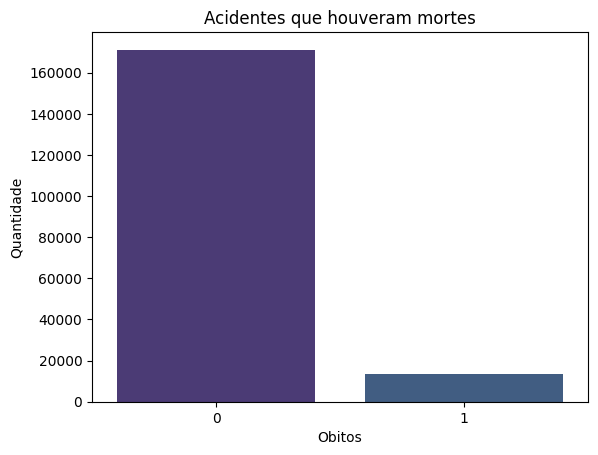

In [12]:
sns.countplot(x = 'obitos', data = df)

plt.title('Acidentes que houveram mortes')
plt.ylabel('Quantidade')
plt.xlabel('Obitos')

In [13]:
df.groupby('obitos')['obitos'].count()

obitos
0    171217
1     13333
Name: obitos, dtype: int64

Text(0, 0.5, 'Quantidade')

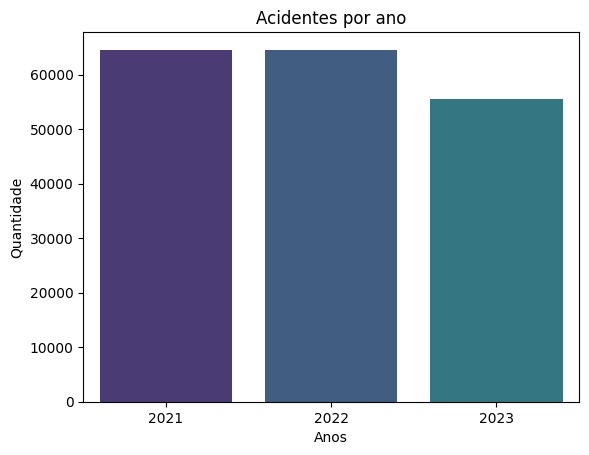

In [14]:
sns.countplot(x = 'ano' , data = df)

plt.title('Acidentes por ano')
plt.xlabel('Anos')
plt.ylabel('Quantidade')

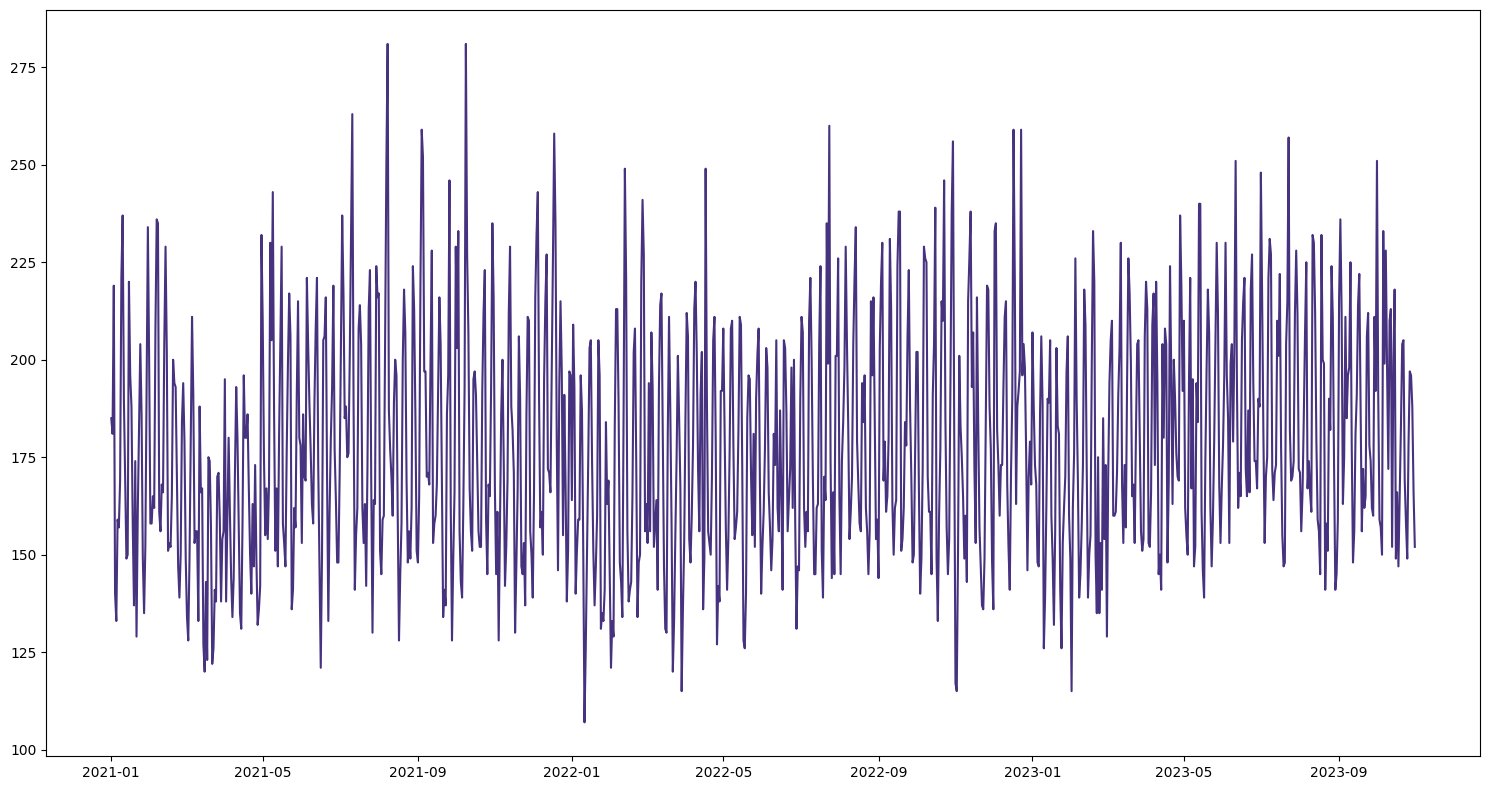

In [15]:
counts = df['data_inversa'].value_counts().sort_index()

plt.figure(figsize=(15,8))
plt.plot(counts.index, counts.values)

plt.tight_layout()

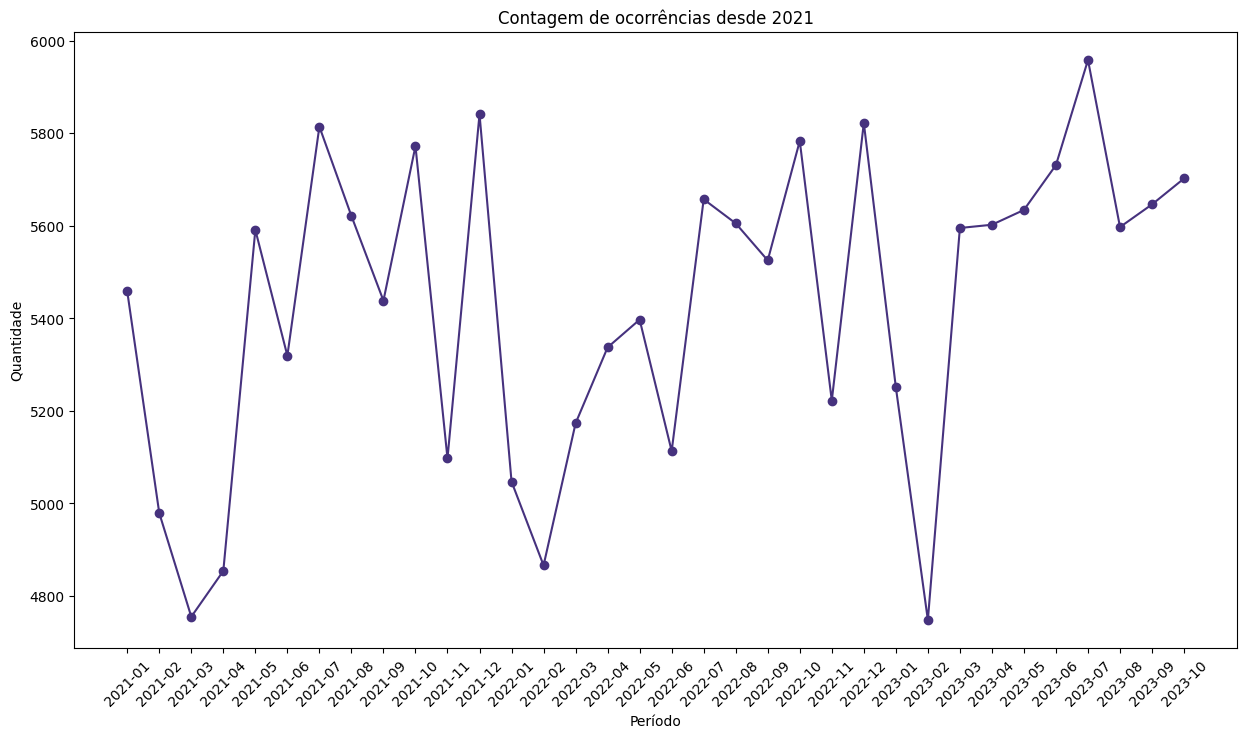

In [52]:
count_por_mes = df['ano_mes'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
plt.plot(count_por_mes.index.astype(str), count_por_mes.values, marker='o')

plt.title('Contagem de ocorrências desde 2021')
plt.xlabel('Período')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)
plt.show()

In [ ]:
count_por_mes = df[df['mortos'] >= 1]['ano_mes'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
plt.plot(count_por_mes.index.astype(str), count_por_mes.values, marker='o')

plt.title('Contagem de ocorrências com mortes')
plt.xlabel('Período')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)
plt.show()

In [ ]:
# count_por_mes

plt.bar(df['mes'].value_counts().index, df['mes'].value_counts().values)

plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Mês')

plt.xticks(df['mes'].unique())
plt.show()

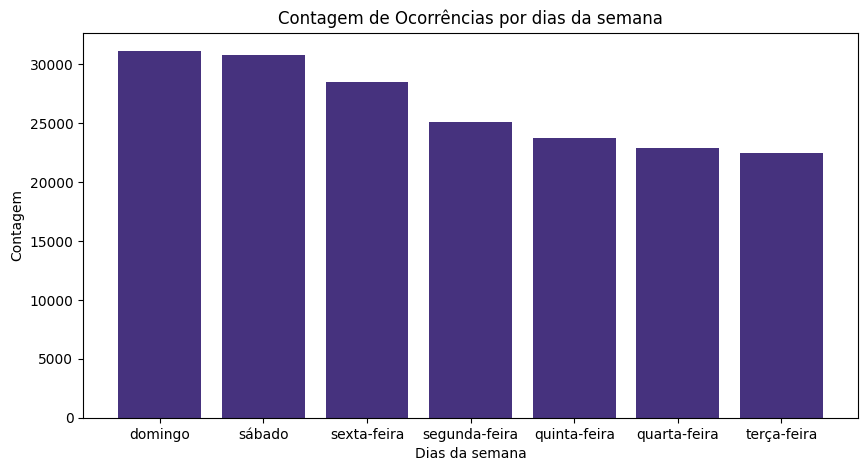

In [62]:
plt.figure(figsize = (10,5))
plt.bar(df['dia_semana'].value_counts().index, df['dia_semana'].value_counts().values)

plt.xlabel('Dias da semana')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por dias da semana')

plt.xticks(df['dia_semana'].unique())
plt.show()